In [31]:
#import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file

In [81]:
df = pd.read_csv('Telecom_challenge_new_dataset.csv')

In [82]:
df

,Unnamed: 0,Number_of_xDR_Sessions,Start,Start ms,End,End ms,Session_Duration,IMSI,MSISDN/Number,IMEI,...,Total_UL,Total_DL,Social_Media_Total,Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total,Decile
0,62,1.304243e+19,4/21/2019 2:55,73.0,4/25/2019 0:17,262.0,336160.0,2.082018e+14,3.376353e+10,8.637690e+13,...,46797611.0,632600264.0,2306304.0,12508343.0,2947986.0,33785357.0,27059520.0,586723162.0,461046993.0,9
1,65,1.311448e+19,4/21/2019 8:26,605.0,4/25/2019 1:20,655.0,320001.0,2.082017e+14,3.366364e+10,3.564211e+13,...,18261248.0,597244693.0,2079990.0,10947068.0,2016170.0,24438238.0,21198618.0,553525983.0,143391779.0,9
2,66,7.349883e+18,4/21/2019 8:54,105.0,4/25/2019 0:48,931.0,316419.0,2.082019e+14,3.366010e+10,3.579881e+13,...,50065095.0,538809148.0,2788022.0,4124132.0,1921045.0,26221282.0,33016593.0,517411244.0,351957444.0,9
3,67,1.311448e+19,4/21/2019 9:19,590.0,4/25/2019 4:42,965.0,329003.0,2.082021e+14,3.365079e+10,3.575751e+13,...,29436200.0,162196572.0,1587744.0,12497259.0,633163.0,23264606.0,21560614.0,126031552.0,489909991.0,9
4,68,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,...,50576233.0,93360974.0,2488677.0,3504964.0,1399164.0,41043086.0,26529939.0,62498650.0,531681682.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125552,149994,1.311448e+19,4/29/2019 7:28,83.0,4/30/2019 15:01,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,6
125553,149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,57628851.0,574175259.0,3517065.0,12784914.0,690876.0,27955095.0,37561864.0,535806880.0,16751926.0,3
125554,149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,39135081.0,666648844.0,2352181.0,4415361.0,2121718.0,22165518.0,40643294.0,631628095.0,714638145.0,5
125555,149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,34912224.0,592786405.0,1260239.0,6585469.0,2058277.0,24516413.0,15029702.0,566933800.0,132415585.0,5


# Show Sample of dataset 

In [83]:
df.sample(5)

,Unnamed: 0,Number_of_xDR_Sessions,Start,Start ms,End,End ms,Session_Duration,IMSI,MSISDN/Number,IMEI,...,Total_UL,Total_DL,Social_Media_Total,Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total,Decile
68785,82698,7.277826e+18,4/27/2019 10:01,364.0,4/28/2019 1:25,882.0,55408.0,2.082010e+14,3.361220e+10,3.590391e+13,...,38879685.0,328389956.0,846147.0,8572530.0,1077615.0,24098496.0,26362529.0,300688094.0,256906464.0,2
59678,71677,1.311448e+19,4/26/2019 8:31,738.0,4/27/2019 9:37,930.0,90336.0,2.082018e+14,3.364982e+10,3.557301e+13,...,31735658.0,836303518.0,2335940.0,5109357.0,3862605.0,24544085.0,32019906.0,799116816.0,254472637.0,5
47575,57400,1.311448e+19,4/25/2019 20:26,3.0,4/27/2019 5:04,717.0,117489.0,2.082018e+14,3.362542e+10,3.572811e+13,...,57984293.0,193607620.0,1635361.0,12636142.0,3105603.0,26877835.0,20745253.0,176590923.0,655166783.0,6
68108,81933,7.349883e+18,4/27/2019 9:31,23.0,4/28/2019 5:03,845.0,70377.0,2.082003e+14,3.369534e+10,3.553321e+13,...,48348960.0,229314034.0,1387868.0,7213387.0,2317398.0,22742258.0,15711970.0,227221494.0,109453071.0,2
101149,120571,1.304243e+19,4/28/2019 3:45,130.0,4/29/2019 3:45,59.0,86399.0,2.082018e+14,3.366251e+10,8.637690e+13,...,45372668.0,715942700.0,1196606.0,8477198.0,2485391.0,22453119.0,27760137.0,698002767.0,164222027.0,3


In [84]:
df.columns

Index(['Unnamed: 0', 'Number_of_xDR_Sessions', 'Start', 'Start ms', 'End',
       'End ms', 'Session_Duration', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       '

In [85]:
# Add a total traffic column 
df['total_traffic'] = df['Total_DL'] + df['Total_UL']

In [86]:
# Aggregate engagement metrics per customer id (MSISDN/Number)
user_engagement = df.groupby('MSISDN/Number').agg({
    'Number_of_xDR_Sessions':'sum',
    'Session_Duration':'sum', 
    'Social_Media_Total':'sum',
    'Google_Total':'sum',
    'Email_Total':'sum', 
    'Youtube_Total':'sum',
    'Netflix_Total':'sum',
    'Gaming_Total':'sum',
    'Other_Total':'sum',
    'total_traffic':'sum'
}).reset_index()

In [87]:
user_engagement

,MSISDN/Number,Number_of_xDR_Sessions,Session_Duration,Social_Media_Total,Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total,total_traffic
0,0.000000e+00,3.216942e+21,26601735.0,747369798.0,3.159747e+09,910956746.0,9.349642e+09,9.247709e+09,1.801715e+11,1.759438e+11,2.070294e+11
1,3.360100e+10,1.311448e+19,116720.0,2232135.0,4.389005e+06,1331362.0,2.162455e+07,2.718098e+07,8.124587e+08,3.865709e+08,8.786906e+08
2,3.360100e+10,7.349883e+18,181230.0,2660565.0,5.334863e+06,3307781.0,1.243222e+07,1.122176e+07,1.197501e+08,2.817101e+08,1.568596e+08
3,3.360100e+10,7.349883e+18,134969.0,3195623.0,3.443126e+06,3205380.0,2.133357e+07,1.935390e+07,5.388277e+08,5.016937e+08,5.959665e+08
4,3.360101e+10,1.304243e+19,49878.0,280294.0,9.678493e+06,2284670.0,6.977321e+06,1.942092e+06,3.911261e+08,3.527970e+07,4.223207e+08
...,...,...,...,...,...,...,...,...,...,...,...
95250,3.378996e+10,1.311448e+19,157069.0,2486946.0,5.990586e+06,3984626.0,2.894776e+07,2.429372e+07,6.386099e+08,7.120621e+08,7.102876e+08
95251,3.378997e+10,1.311448e+19,160461.0,1413370.0,9.892882e+06,3396607.0,2.822648e+07,3.037030e+07,1.348159e+08,4.081072e+08,2.081231e+08
95252,3.378998e+10,1.311448e+19,178525.0,1831520.0,5.306103e+06,2350001.0,2.782677e+07,1.661722e+07,6.665852e+08,3.070678e+08,7.230377e+08
95253,3.379000e+10,1.304243e+19,8810.0,300183.0,7.531269e+06,1006915.0,2.664784e+07,1.490254e+07,6.603614e+08,2.952828e+08,7.146416e+08


In [66]:
# Reporting the top 10 customers per engagement metric
top_10_session = user_engagement.nlargest(10, 'Number_of_xDR_Sessions')
top_10_duration = user_engagement.nlargest(10, 'Session_Duration')
top_10_traffic = user_engagement.nlargest(10, 'total_traffic')

print("Top 10 customers by session frequency:\n", top_10_session)
print("Top 10 customers by session duration:\n", top_10_duration)
print("Top 10 customers by total traffic:\n", top_10_traffic)


Top 10 customers by session frequency:
        MSISDN/Number  Number_of_xDR_Sessions  Session_Duration  \
0       0.000000e+00            3.216942e+21        26601735.0   
33780   3.365973e+10            1.436108e+20         2578418.0   
68204   3.367588e+10            1.307125e+20         2269343.0   
1545    3.360658e+10            1.175259e+20         1322251.0   
35685   3.366025e+10            1.046276e+20          761704.0   
19949   3.364618e+10            1.045556e+20         1249844.0   
28397   3.365836e+10            1.043394e+20         1204860.0   
82784   3.376041e+10            1.043394e+20         1495445.0   
80754   3.369998e+10            1.043394e+20         1472883.0   
68296   3.367608e+10            9.180138e+19          308977.0   

       Social_Media_Total  Google_Total  Email_Total  Youtube_Total  \
0             747369798.0  3.159747e+09  910956746.0   9.349642e+09   
33780          23975362.0  8.110032e+07   26154074.0   1.718989e+08   
68204          13417

In [67]:
#normalize the engagement metrics 
scaler = MinMaxScaler()
normalize_engagment = scaler.fit_transform(user_engagement[['Number_of_xDR_Sessions','Session_Duration','total_traffic']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['engagement_cluster'] = kmeans.fit_predict(normalize_engagment)


In [68]:
# Compute metrics for each cluster
cluster_metrics = user_engagement.groupby('engagement_cluster').agg({
    'Number_of_xDR_Sessions': ['min', 'max', 'mean', 'sum'],
    'Session_Duration': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_metrics)

  engagement_cluster Number_of_xDR_Sessions                              \
                                        min           max          mean   
0                  0           7.277826e+18  1.436108e+20  2.804351e+19   
1                  1           6.917538e+18  3.934345e+19  1.098915e+19   
2                  2           3.216942e+21  3.216942e+21  3.216942e+21   

                Session_Duration                                          \
            sum              min         max          mean           sum   
0  3.538531e+23          46896.0   2578418.0  3.379826e+05  4.264664e+09   
1  9.080992e+23           7142.0    319356.0  1.037272e+05  8.571604e+09   
2  3.216942e+21       26601735.0  26601735.0  2.660174e+07  2.660174e+07   

  total_traffic                                            
            min           max          mean           sum  
0  6.010710e+07  5.179123e+09  1.273384e+09  1.606756e+13  
1  3.324901e+07  2.159607e+09  5.563354e+08  4.597333e+13  
2  

# Visualize result

Text(0.5, 1.0, 'Sessions Frequency by Cluster')

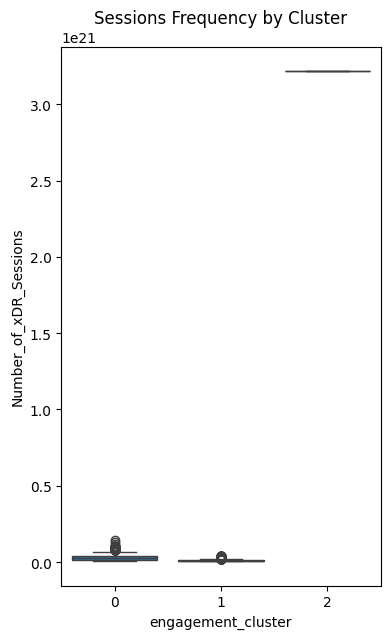

In [69]:
# Plotting the engagement clusters
plt.figure(figsize=(14, 7))

# Sessions Frequency
plt.subplot(1, 3, 1)
sns.boxplot(data=user_engagement, x='engagement_cluster', y='Number_of_xDR_Sessions')
plt.title('Sessions Frequency by Cluster')

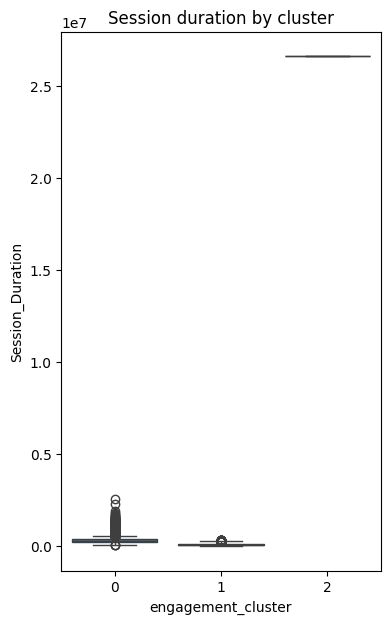

In [70]:
plt.figure(figsize=(14,7))
# Session duration 
plt.subplot(1,3,1)
sns.boxplot(data = user_engagement, x='engagement_cluster',y= 'Session_Duration')
plt.title('Session duration by cluster')
plt.show()

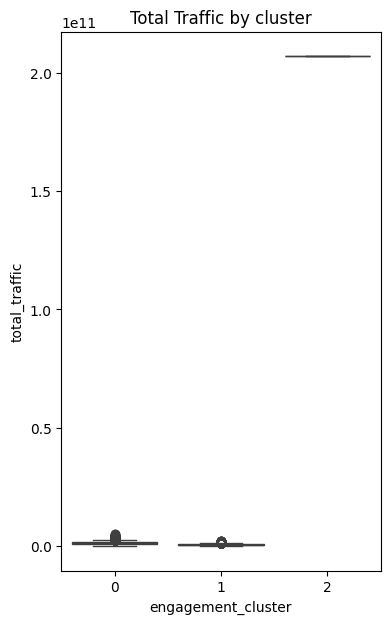

In [71]:
plt.figure(figsize=(14,7))
# Total traffic 
plt.subplot(1,3,1)
sns.boxplot(data= user_engagement, x='engagement_cluster', y='total_traffic')
plt.title('Total Traffic by cluster')
plt.show()

# Agreegate User Traffic Per Application And Top 10 Most Engaged User Per Application 

In [72]:
df.columns

Index(['Unnamed: 0', 'Number_of_xDR_Sessions', 'Start', 'Start ms', 'End',
       'End ms', 'Session_Duration', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       '

In [73]:
# Asuming the the dataset has application specific traffic columns
application_columns = ['Social_Media_Total','Google_Total','Email_Total','Youtube_Total','Netflix_Total','Gaming_Total','Other_Total']
user_application_traffic = df.groupby('MSISDN/Number')[application_columns].sum().reset_index()

# Identify top 10 most engaged users per application
top_10_users_per_app = {}
for app in application_columns:
    top_10_users_per_app[app] = user_application_traffic.nlargest(10, app)

print(top_10_users_per_app)

{'Social_Media_Total':        MSISDN/Number  Social_Media_Total  Google_Total  Email_Total  \
0       0.000000e+00         747369798.0  3.159747e+09  910956746.0   
33780   3.365973e+10          23975362.0  8.110032e+07   26154074.0   
35685   3.366025e+10          19069454.0  6.510109e+07   19235744.0   
12728   3.362632e+10          17671306.0  5.901818e+07   12818929.0   
80754   3.369998e+10          16760967.0  6.636856e+07   22077527.0   
1545    3.360658e+10          16464155.0  8.549232e+07   18308658.0   
34826   3.366003e+10          16423570.0  4.517399e+07   13194481.0   
63292   3.366907e+10          16357418.0  4.647689e+07   13790906.0   
50390   3.366433e+10          16317571.0  4.750204e+07   19611017.0   
28397   3.365836e+10          16008416.0  6.586085e+07   15203757.0   

       Youtube_Total  Netflix_Total  Gaming_Total   Other_Total  
0       9.349642e+09   9.247709e+09  1.801715e+11  1.759438e+11  
33780   1.718989e+08   2.794949e+08  4.133032e+09  4.288306e+09

In [74]:
# Plot top 3 most used application 
total_traffic_per_app = user_application_traffic[application_columns].sum().nlargest(3)
top3_apps = total_traffic_per_app.index

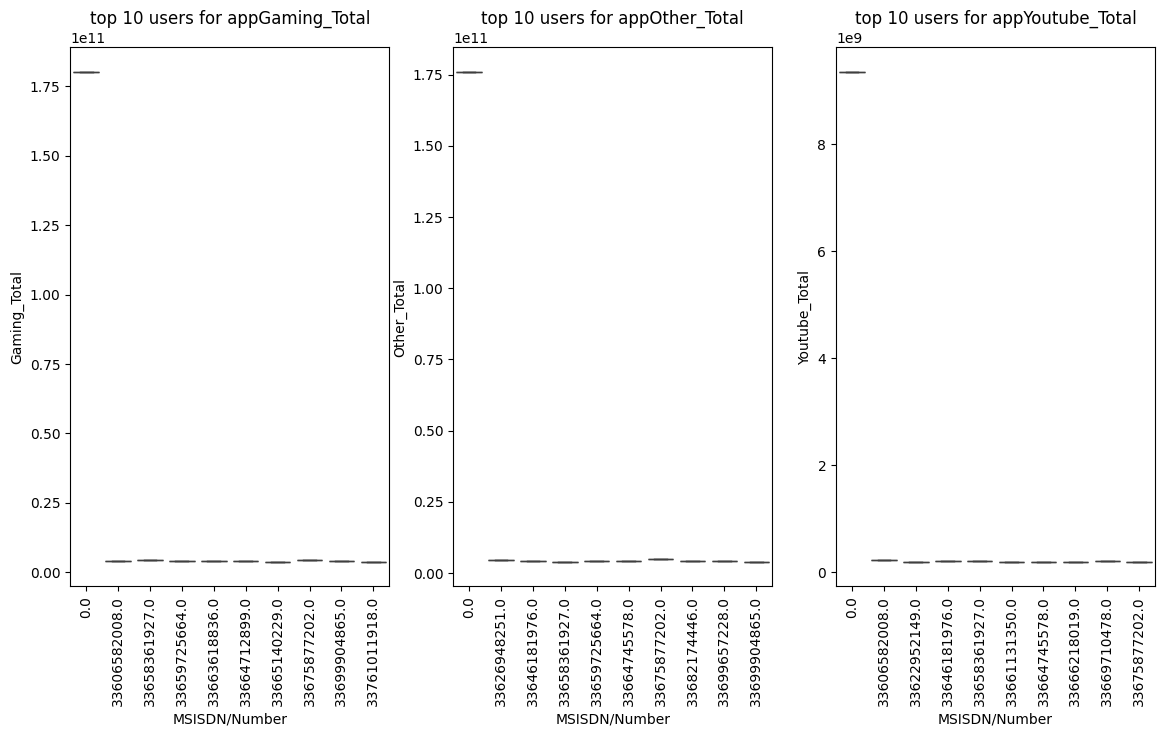

In [75]:
#plot top 3 most used applcations 
plt.figure(figsize=(14,7))
for i, app in enumerate(top3_apps,1): 
    plt.subplot(1,3,i)
    sns.boxplot(data=top_10_users_per_app[app],x='MSISDN/Number', y=app)
    plt.title(f'top 10 users for app{app}')
    plt.xticks(rotation=90)

plt.tight_layout
plt.show()
    

# Optimize K Using Elbow Method 

In [76]:
#Determine optimal numbers of cluster using the elbow method 
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalize_engagment)
    inertia.append(kmeans.inertia_)

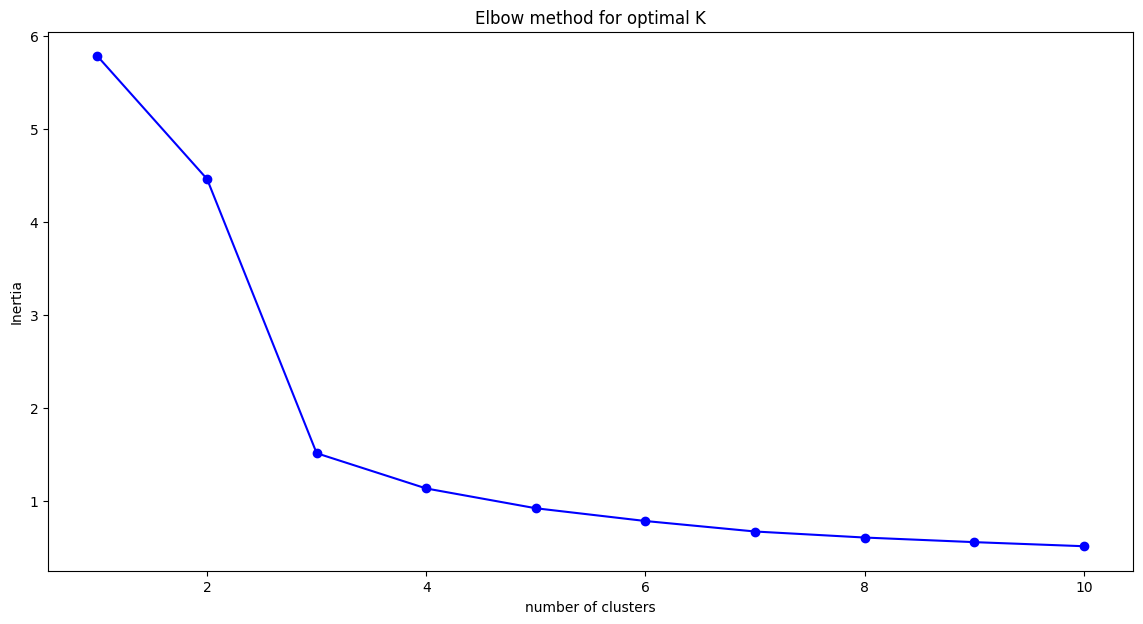

In [77]:
# Plot the elbow curve 
plt.figure(figsize=(14,7))
plt.plot(K,inertia,'bo-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show()

In [88]:
df.to_csv('engagement_analysis_data.csv')

In [92]:
user_engagement.to_csv('user_engagement.csv',index= False)